# ***Heart Attack Prediction using Naive Bayes Classifier***

---








## <span style="color:blue"> Importing Our dataset & Setting The Environment</span>


In [ ]:
#Installing kaggle
! pip install -q kaggle

## Download the JSON file in this link and upload it in the next cell when you run it [kaggel.JSON](https://drive.google.com/file/d/14kgd1riT-m-zk2Y1HBNtWzz1PEJ7lx2f/view?usp=sharing)

In [ ]:
#importing files
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raghdatarekk","key":"6b60d927292f98de410b5fe88dc9a3d0"}'}

In [ ]:
#creating a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copying kaggle.json to created folder
! cp kaggle.json ~/.kaggle/

In [ ]:
#giving permission for json to  act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#downloading our dataset from kaggle
! kaggle datasets download -d rashikrahmanpritom/heart-attack-analysis-prediction-dataset

  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 8.83MB/s]


In [ ]:
! unzip \*.zip  && rm *.zip

Archive:  heart-attack-analysis-prediction-dataset.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        




---




# **<span style="color:blue"> I. Variables Classification</span>**





*   Age: Quantitative (continuous )
*   Sex: Categorical (binary)
*   ChestPainType: Categorical (nominal)
*   RestingBloodPressure: Quantitative (continuous)
*   Cholesterol: Quantitative (continuous)
*   FastingBloodSugar: Categorical (binary)
*   RestingECG: Categorical (nominal)
*   MaxHeartRateAchieved: Quantitative (continuous)
*   ExerciseInducedAngina: Categorical (Binary)
*   STDepression: Quantitative (continuous)
*   ST_Slope: Categorical (ordinal)
*   NumMajorVessels: Quantitative (discrete)
*   Thalassemia: Categorical (nominal)
*   Output (target variable): Categorical (binary)

## Our Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns #data visualization
import pandas as pd # data processing
import numpy as np  # linear algebra
from tabulate import tabulate
from sklearn.model_selection import train_test_split #splitting data
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import kstest

## Dataset Classifying

In [ ]:
# Loading our Dataset
HEART = pd.read_csv("heart.csv")

# A list of all variables in our dataset
variables=HEART.columns.to_list()

#separating the variables into numerical and categorical values.
num_col = ['age', 'trtbps', 'chol' ,'thalachh', 'oldpeak', 'caa' ]
cat_col = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'thall', 'output']


# **<span style="color:blue"> II. Removing Outliers</span>**


---



(303, 14)


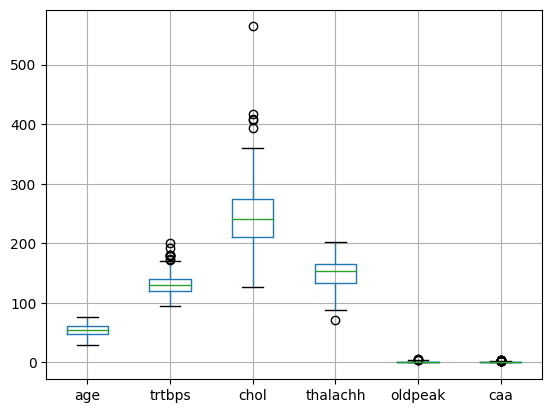

In [ ]:
#detect the outliers using the boxplots

HEART.boxplot(num_col)
print(HEART.shape)

###As we see all the variables contain outliers exept the age, now we will work on removing those outliers

In [ ]:
#Removing the outliers using IQR method

#Counting null values before outlier removal
null_count_before = HEART.isna().sum()

# Iterating over each variable
for var in num_col:
    # Calculating the 75th and 25th percentiles
    q75, q25 = np.percentile(HEART[var], [75, 25])
    intr_qr = q75 - q25

    # Calculating the upper and lower bounds for outliers
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    # Replacing outliers with null values
    HEART.loc[HEART[var] < min, var] = np.nan
    HEART.loc[HEART[var] > max, var] = np.nan

# Counting null values after outlier removal
null_count_after = HEART.isna().sum()

# Creating a DataFrame to compare null counts before and after removal
null_counts = pd.DataFrame({'NaN Count Before': null_count_before, 'NaN Count After': null_count_after})

# Displaying the table
print(null_counts)

# Droping rows with any null values
HEART = HEART.dropna(axis=0)

          NaN Count Before  NaN Count After
age                      0                0
sex                      0                0
cp                       0                0
trtbps                   0                9
chol                     0                5
fbs                      0                0
restecg                  0                0
thalachh                 0                1
exng                     0                0
oldpeak                  0                5
slp                      0                0
caa                      0               25
thall                    0                0
output                   0                0


(263, 14)


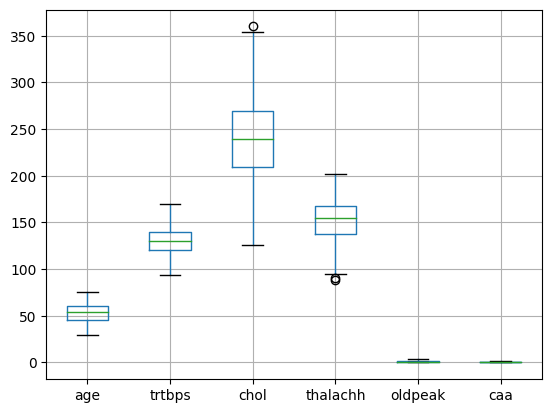

In [ ]:
#dataset after the outliers
HEART.boxplot(num_col)
print(HEART.shape)

# **<span style="color:blue"> III. Descriptive Statistics</span>**


---



> ## **<span style="color:blue"> 1. Descriptive Statistics [Numerical Variables]</span>**





In [ ]:
numerical_data = []  # List to store table rows

for vik in num_col:
    # Calculating measures of central tendency
    mean = HEART[vik].mean()         # Mean
    median = HEART[vik].median()     # Median
    mode = HEART[vik].mode().iloc[0] # Mode

    # Calculating measures of dispersion
    range_val = HEART[vik].max() - HEART[vik].min()          # Range
    variance = HEART[vik].var()                      # Variance
    standard_deviation = HEART[vik].std()            # Standard Deviation
    interquartile_range = HEART[vik].quantile(0.75) - HEART[vik].quantile(0.25)  # Interquartile Range

    # Appending the statistics as a row to our table_data list
    numerical_data.append([vik, mean, median, mode, range_val, variance, standard_deviation, interquartile_range])

# Defining the table headers
headers = ["Variable", "Mean", "Median", "Mode", "Range", "Variance", "Standard Deviation", "Interquartile Range"]

# Printing the table
print()
print(tabulate(numerical_data, headers=headers, tablefmt="grid"))
print()


+------------+------------+----------+--------+---------+-------------+----------------------+-----------------------+
| Variable   |       Mean |   Median |   Mode |   Range |    Variance |   Standard Deviation |   Interquartile Range |
+============+============+==========+========+=========+=============+======================+=======================+
| age        |  53.7681   |     54   |     57 |      47 |   81.1941   |              9.01078 |                  14   |
+------------+------------+----------+--------+---------+-------------+----------------------+-----------------------+
| trtbps     | 129.468    |    130   |    120 |      76 |  236.853    |             15.39    |                  20   |
+------------+------------+----------+--------+---------+-------------+----------------------+-----------------------+
| chol       | 241.779    |    239   |    197 |     234 | 1964.62     |             44.324   |                  60   |
+------------+------------+----------+--------+

> ## **<span style="color:blue"> 2. Descriptive Statistics [Categorical Variables]</span>**


In [ ]:
# Creating a table to store the frequency results
frequency_table = []

# Looping over each categorical variable and calculating its frequency
for vik in cat_col:
    frequency = HEART[vik].value_counts().reset_index()
    frequency.columns = ['Category', 'Frequency']

    # Appending the frequency results to the table
    frequency_table.append([vik, tabulate(frequency, headers='keys', tablefmt='psql')])

print()
# Displaying the frequency results table
for column, table in frequency_table:
    print(f"Frequency for {column}:")
    print(table)
    print()



Frequency for sex:
+----+------------+-------------+
|    |   Category |   Frequency |
|----+------------+-------------|
|  0 |          1 |         180 |
|  1 |          0 |          83 |
+----+------------+-------------+

Frequency for cp:
+----+------------+-------------+
|    |   Category |   Frequency |
|----+------------+-------------|
|  0 |          0 |         119 |
|  1 |          2 |          75 |
|  2 |          1 |          47 |
|  3 |          3 |          22 |
+----+------------+-------------+

Frequency for fbs:
+----+------------+-------------+
|    |   Category |   Frequency |
|----+------------+-------------|
|  0 |          0 |         229 |
|  1 |          1 |          34 |
+----+------------+-------------+

Frequency for restecg:
+----+------------+-------------+
|    |   Category |   Frequency |
|----+------------+-------------|
|  0 |          1 |         136 |
|  1 |          0 |         125 |
|  2 |          2 |           2 |
+----+------------+-------------+

# **<span style="color:blue"> IV. Standardization </span>**

---


Using Standardization Formula $Z = \frac{{X - \mu}}{{\sigma}}$


In [ ]:
df_z = HEART[num_col]
HEART[num_col] = (df_z-df_z.mean())/df_z.std()
HEART.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,263.000000,263.000000,263.000000,2.630000e+02,2.630000e+02,263.000000,263.000000,2.630000e+02,263.000000,2.630000e+02,263.000000,263.000000,263.000000,263.000000
mean,0.000000,0.684411,1.000000,3.377104e-17,1.013131e-17,0.129278,0.532319,-2.701683e-17,0.315589,5.403367e-17,1.433460,0.000000,2.281369,0.577947
std,1.000000,0.465636,1.037466,1.000000e+00,1.000000e+00,0.336147,0.514949,1.000000e+00,0.465636,1.000000e+00,0.607163,1.000000,0.609025,0.494829
min,-2.748716,0.000000,0.000000,-2.304588e+00,-2.612118e+00,0.000000,0.000000,-2.783601e+00,0.000000,-9.187248e-01,0.000000,-0.702571,0.000000,0.000000
25%,-0.862086,0.000000,0.000000,-6.151828e-01,-7.395425e-01,0.000000,0.000000,-5.921212e-01,0.000000,-9.187248e-01,1.000000,-0.702571,2.000000,0.000000
50%,0.025740,1.000000,1.000000,3.458859e-02,-6.270799e-02,0.000000,1.000000,1.826444e-01,0.000000,-3.397521e-01,1.000000,-0.702571,2.000000,1.000000
75%,0.691610,1.000000,2.000000,6.843600e-01,6.141265e-01,0.000000,1.000000,7.581845e-01,1.000000,6.252025e-01,2.000000,0.686724,3.000000,1.000000
max,2.467261,1.000000,3.000000,2.633674e+00,2.667191e+00,1.000000,2.000000,2.263443e+00,1.000000,2.941093e+00,2.000000,2.076018,3.000000,1.000000


# **<span style="color:blue"> V. Splitting The Data </span>**


---



In [ ]:
# Splitting the data into training and testing sets
train_data, test_data = train_test_split(HEART, test_size=0.2, random_state=41)

# slicing all raws and all columns except the last column
train_features = train_data.iloc[:,:-1].values
# slicing all raws and the last column
train_output = train_data.iloc[:,-1].values

# slicing all raws and all columns except the last column
test_features = test_data.iloc[:,:-1].values
# slicing all raws and the last column
test_output = test_data.iloc[:,-1].values

# Checking the shapes of the training and testing sets
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)

print(" Training features set shape:", train_features.shape)
print("Training output set shape:", train_output.shape)

print("Testing features set shape:", test_features.shape)
print("Testing output set shape:", test_output.shape)

Training set shape: (210, 14)
Testing set shape: (53, 14)
 Training features set shape: (210, 13)
Training output set shape: (210,)
Testing features set shape: (53, 13)
Testing output set shape: (53,)


# **<span style="color:blue"> VI. Plotting & Statistical Tests </span>**

---


In [ ]:
print(variables)
print(num_col)
print(cat_col)


['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']
['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'thall', 'output']


>## ${\color{yellow}{{ 1-Age }}}$

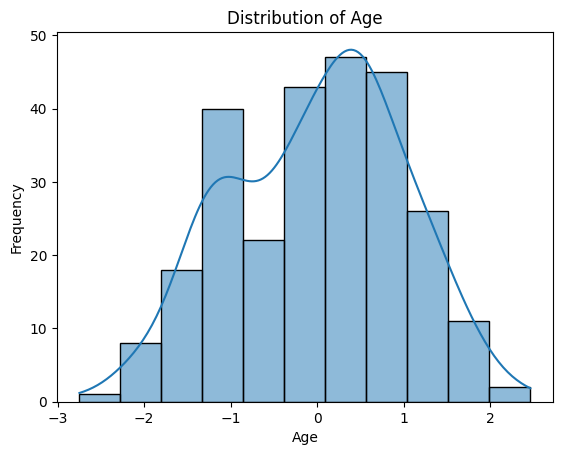

By visual inspection, we notice that the destribution of 'Age' is normal distribution
The 'age' feature is normally distributed (fail to reject H0)


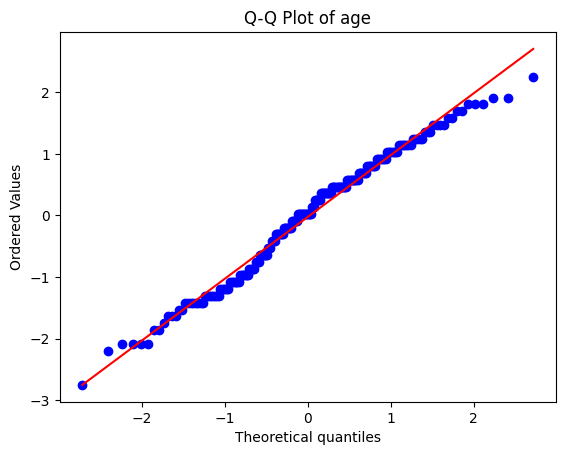

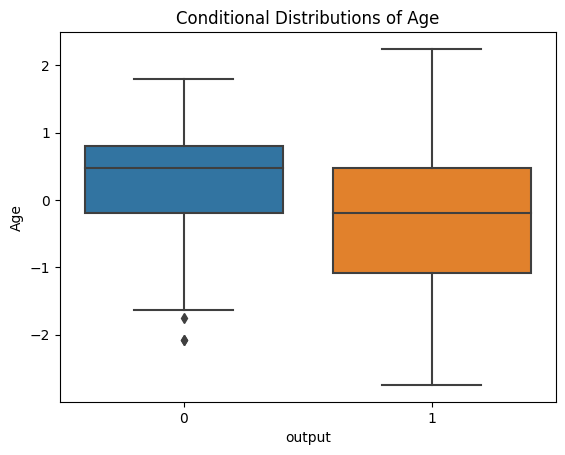

In [ ]:
#Plot the histogram/distribution.
sns.histplot(HEART, x="age", kde=True)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


#type of the distribution : gaussien
print("By visual inspection, we notice that the destribution of 'Age' is normal distribution")


#Statistically test if a feature/column is normally distributed using Kolmogorov-Smirnov test
stat, p_value = kstest(train_data['age'], 'norm')

alpha = 0.05  # Significance level

# Interpret the test result
if p_value > alpha:
    print("The 'age' feature is normally distributed (fail to reject H0)")
else:
    print("The 'age' feature is not normally distributed (reject H0)")

# Generate a Q-Q plot to compare the data against a normal distribution
stats.probplot(train_data['age'], dist='norm', plot=plt)
plt.title('Q-Q Plot of age')
plt.show()


#Plot the conditional distributions of each feature on each target class (label).
"""
In the heart attack Kaggle dataset, the target variable is the "output" variable,
which indicates whether a person is at risk of a heart attack or not.
"""
# Plot using box plots
sns.boxplot(x='output', y='age', data=train_data)
plt.xlabel('output')
plt.ylabel('Age')
plt.title('Conditional Distributions of Age')
plt.show()


> ## ${\color{yellow}{{ 2- Sex  (1 = male; 0 = female) }}}$

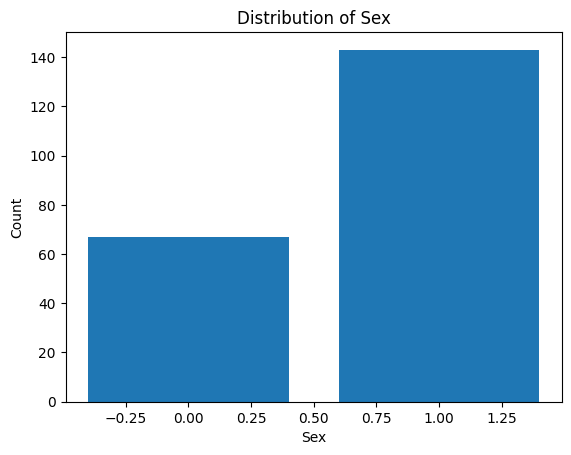

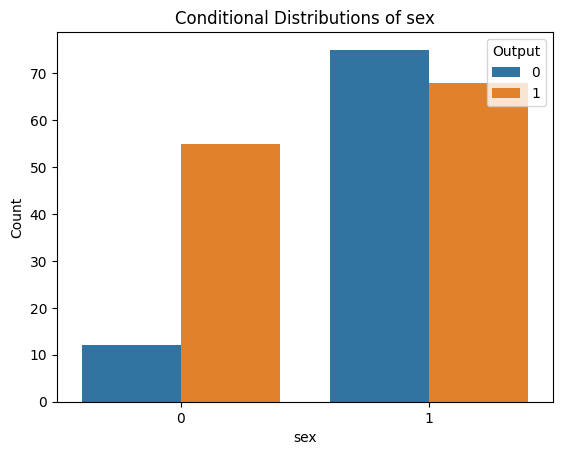

In [ ]:
#Plot the histogram/distribution.
sex_counts =train_data['sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()


#Statistically test if a feature/column is normally distributed.
"""
There is no such thing as normality of categorical variable.
Normal distribution is a continuous distribution so in assumption don't cover categorical output.
"""

# Plot conditional distributions using count plot
sns.countplot(x='sex', hue='output', data=train_data )
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Conditional Distributions of sex')
plt.legend(title='Output', loc='upper right')
plt.show()

> ## ${\color{yellow} {3-exng: \text {exercise induced angina (1 = yes; 0 = no)}}}$

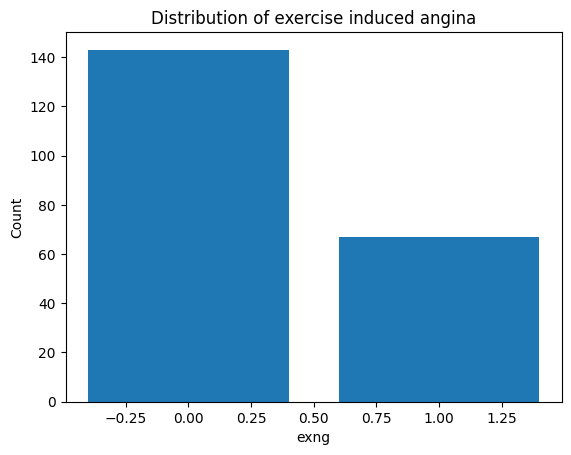

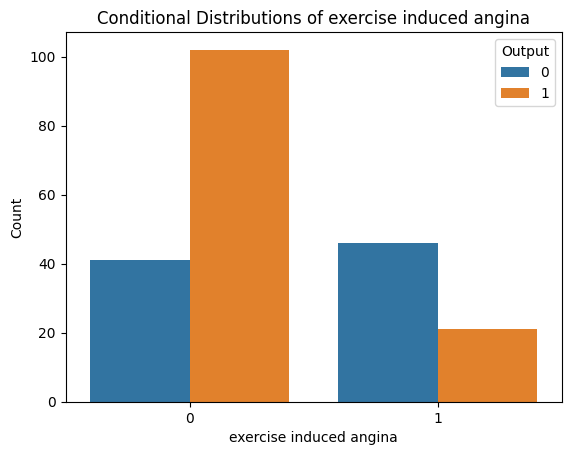

In [ ]:
#Plot the histogram/distribution.
exng_counts =train_data['exng'].value_counts()
plt.bar(exng_counts.index, exng_counts.values)
plt.xlabel('exng')
plt.ylabel('Count')
plt.title('Distribution of exercise induced angina')
plt.show()


# Plot conditional distributions using count plot
sns.countplot(x='exng', hue='output', data=train_data)
plt.xlabel('exercise induced angina')
plt.ylabel('Count')
plt.title('Conditional Distributions of exercise induced angina')
plt.legend(title='Output', loc='upper right')
plt.show()

> ## ${\color{yellow} {4- caa: \text {number of major vessels (0-3)}}}$

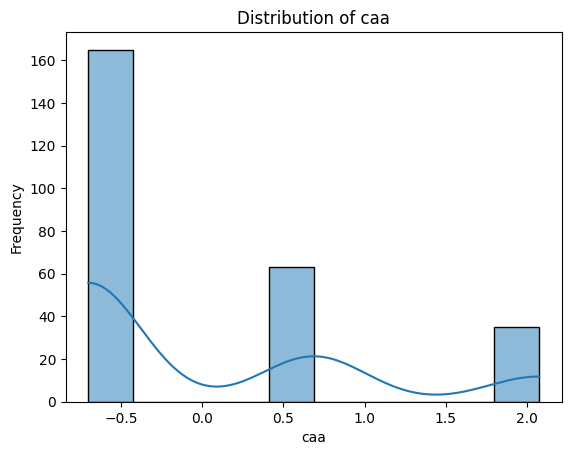

By visual inspection, we notice that the destribution of 'caa' is skewed distribution
The data is significantly skewed (reject H0)
The 'caa' feature is not normally distributed (reject H0)


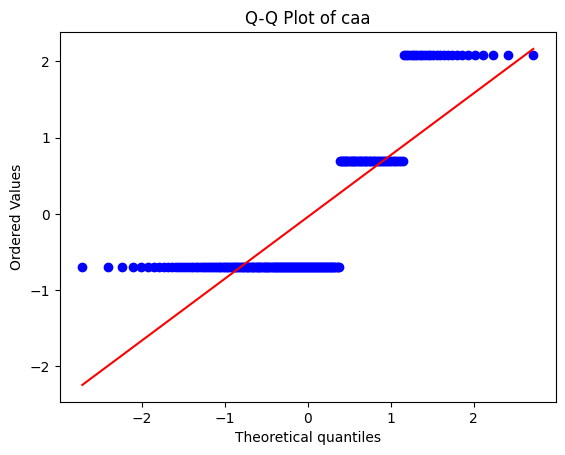

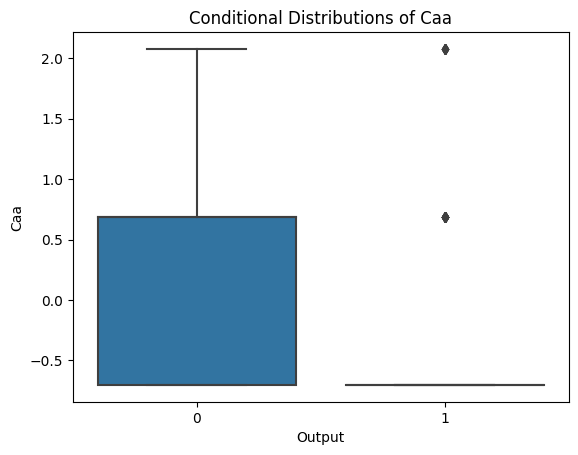

In [ ]:
#Plot the histogram/distribution.
sns.histplot(HEART, x="caa", kde=True)

plt.xlabel('caa')
plt.ylabel('Frequency')
plt.title('Distribution of caa')
plt.show()


#type of the distribution
print("By visual inspection, we notice that the destribution of 'caa' is skewed distribution")

# Skewness test
test_stat, p_value_skew = stats.skewtest(train_data['caa'])

# Interpret the test results
if p_value_skew > alpha:
    print("The data is not significantly skewed (fail to reject H0)")
else:
    print("The data is significantly skewed (reject H0)")




#Statistically test if a feature/column is normally distributed using Kolmogorov-Smirnov test
stat, p_value = kstest(train_data['caa'], 'norm')

alpha = 0.05  # Significance level

# Interpret the test result
if p_value > alpha:
    print("The 'caa' feature is normally distributed (fail to reject H0)")
else:
    print("The 'caa' feature is not normally distributed (reject H0)")

# Generate a Q-Q plot to compare the data against a normal distribution
stats.probplot(train_data['caa'], dist='norm', plot=plt)
plt.title('Q-Q Plot of caa')
plt.show()


#Plot the conditional distributions of each feature on each target class (label).
"""
In the heart attack Kaggle dataset, the target variable is the "output" variable,
which indicates whether a person is at risk of a heart attack or not.
"""
# Plot using box plots
sns.boxplot(x='output', y='caa', data=train_data)
plt.xlabel('Output')
plt.ylabel('Caa')
plt.title('Conditional Distributions of Caa')
plt.show()



> ## ${\color{yellow} {5- cp: \text { chest pain type}}}$

- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic


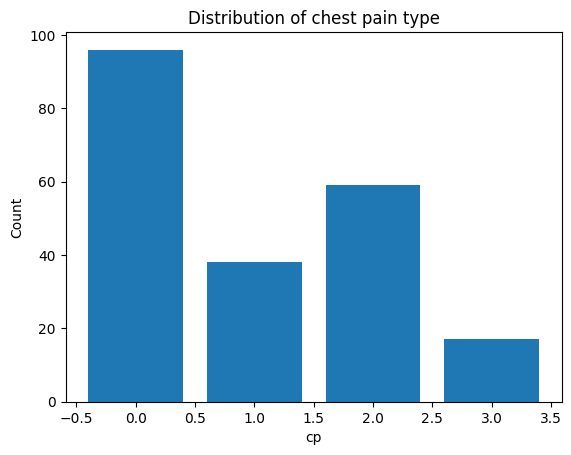

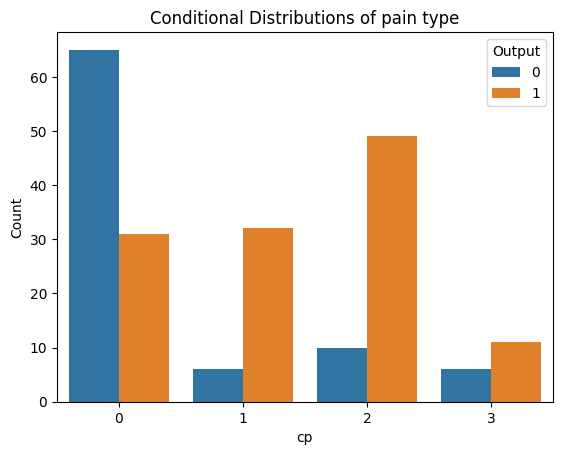

In [ ]:
#Plot the histogram/distribution.
cp_counts =train_data['cp'].value_counts()
plt.bar(cp_counts.index, cp_counts.values)
plt.xlabel('cp')
plt.ylabel('Count')
plt.title('Distribution of chest pain type')
plt.show()


# Plot conditional distributions using count plot
sns.countplot(x='cp', hue='output', data=train_data)
plt.xlabel('cp')
plt.ylabel('Count')
plt.title('Conditional Distributions of pain type')
plt.legend(title='Output', loc='upper right')
plt.show()

> ## ${\color{yellow} {6- trtbps: \text {resting blood pressure (in mm Hg)}}}$

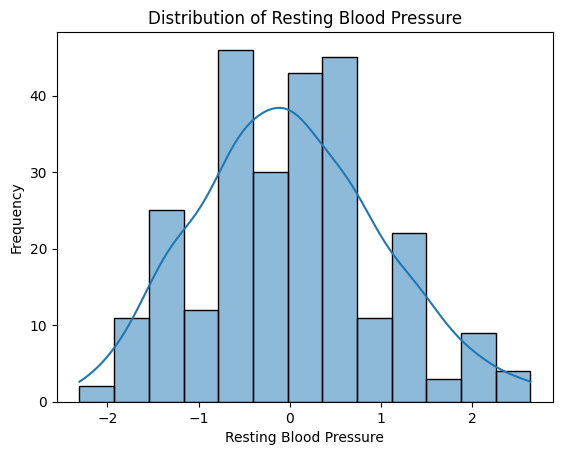

By visual inspection, we notice that the destribution of 'trtbps' is normal distribution
The data follows a normal distribution (fail to reject H0)
The data follows a normal distribution at 0.15 significance level
The data follows a normal distribution at 0.1 significance level
The data follows a normal distribution at 0.05 significance level
The data follows a normal distribution at 0.025 significance level
The data follows a normal distribution at 0.01 significance level


<ipython-input-23-71d44353d6ef>:31: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ad_statistic.size > 0 and ad_statistic > critical_values[idx]:


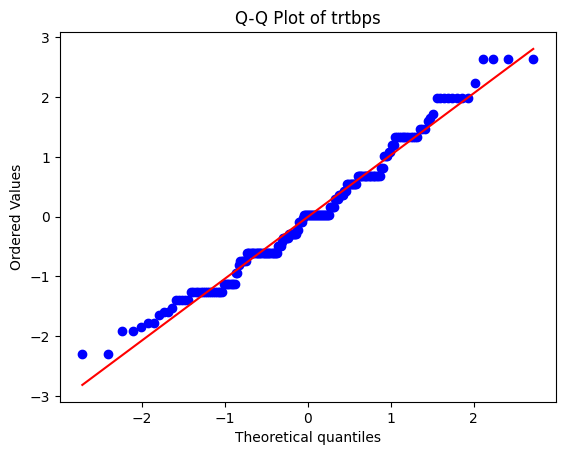

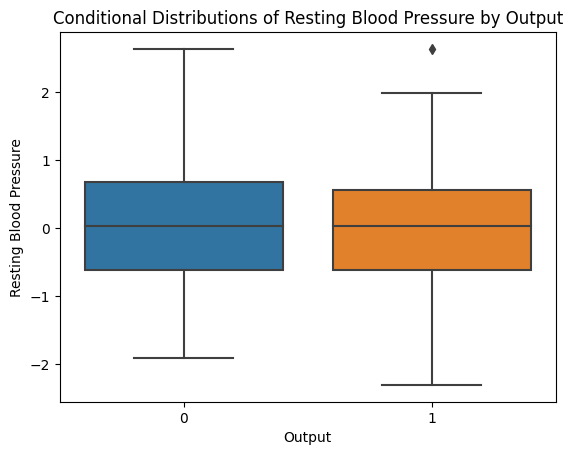

In [ ]:
# Plot the histogram
sns.histplot(HEART, x="trtbps", kde=True)
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.title('Distribution of Resting Blood Pressure')
plt.show()

#type of the distribution : gaussien
print("By visual inspection, we notice that the destribution of 'trtbps' is normal distribution")

# Kolmogorov-Smirnov Test
test_stat, p_value = stats.kstest(train_data['trtbps'], 'norm')

alpha = 0.05  # Significance level

# Interpret the test result
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject H0)")
else:
    print("The data does not follow a normal distribution (reject H0)")

# Anderson-Darling Test
result = stats.anderson(train_data['trtbps'], 'norm')
significance_levels = [0.15, 0.10, 0.05, 0.025, 0.01]
ad_statistic = result.statistic
critical_values = result.critical_values

# Compare the test statistic against critical values at different significance levels
for alpha in significance_levels:
    idx = np.where(result.significance_level == alpha)[0]
    if ad_statistic.size > 0 and ad_statistic > critical_values[idx]:
        print(f"The data does not follow a normal distribution at {alpha} significance level")
    else:
        print(f"The data follows a normal distribution at {alpha} significance level")




# Generate a Q-Q plot to compare the data against a normal distribution
stats.probplot(train_data['trtbps'], dist='norm', plot=plt)
plt.title('Q-Q Plot of trtbps')
plt.show()


# Plot conditional distributions using box plots
sns.boxplot(x='output', y='trtbps', data=train_data)
plt.xlabel('Output')
plt.ylabel('Resting Blood Pressure')
plt.title('Conditional Distributions of Resting Blood Pressure by Output')
plt.show()



> ## ${\color{yellow} {7- chol: \text {cholestoral in mg/dl fetched via BMI sensor}}}$

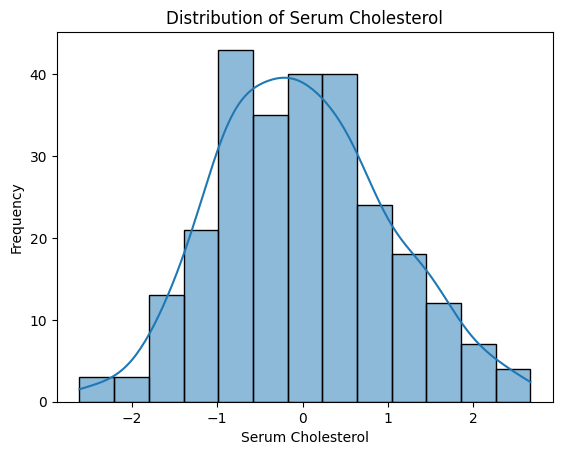

By visual inspection, we notice that the destribution of 'chol' is normal distribution
The data follows a normal distribution (fail to reject H0)
The data follows a normal distribution at 0.15 significance level
The data follows a normal distribution at 0.1 significance level
The data follows a normal distribution at 0.05 significance level
The data follows a normal distribution at 0.025 significance level
The data follows a normal distribution at 0.01 significance level


<ipython-input-24-ea66ba0f3641>:34: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if ad_statistic > critical_values[idx]:


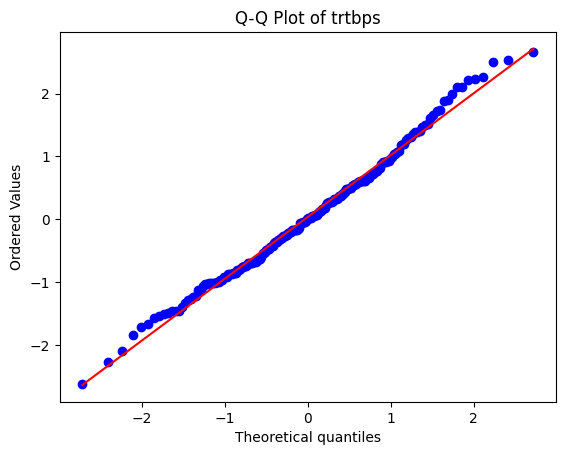

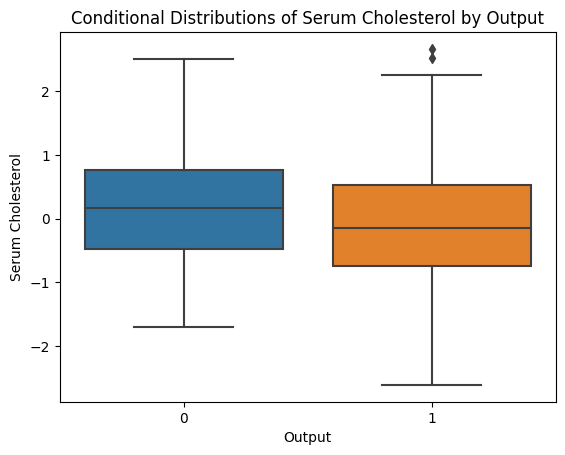

In [ ]:
# Plot the histogram
sns.histplot(HEART, x="chol", kde=True)
plt.xlabel('Serum Cholesterol')
plt.ylabel('Frequency')
plt.title('Distribution of Serum Cholesterol')
plt.show()

#type of the distribution : gaussien
print("By visual inspection, we notice that the destribution of 'chol' is normal distribution")

# Kolmogorov-Smirnov Test
test_stat, p_value = stats.kstest(train_data['chol'], 'norm')

alpha = 0.05  # Significance level

# Interpret the test result
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject H0)")
else:
    print("The data does not follow a normal distribution (reject H0)")



# Anderson-Darling Test
result = stats.anderson(train_data['chol'], 'norm')

significance_levels = [0.15, 0.10, 0.05, 0.025, 0.01]
ad_statistic = result.statistic
critical_values = result.critical_values

# Compare the test statistic against critical values at different significance levels
for alpha in significance_levels:
    idx = np.where(result.significance_level == alpha)[0]
    if ad_statistic > critical_values[idx]:
        print(f"The data does not follow a normal distribution at {alpha} significance level")
    else:
        print(f"The data follows a normal distribution at {alpha} significance level")

# Generate a Q-Q plot to compare the data against a normal distribution
stats.probplot(train_data['chol'], dist='norm', plot=plt)
plt.title('Q-Q Plot of trtbps')
plt.show()


# Plot conditional distributions using box plots
sns.boxplot(x='output', y='chol', data=train_data)
plt.xlabel('Output')
plt.ylabel('Serum Cholesterol')
plt.title('Conditional Distributions of Serum Cholesterol by Output')
plt.show()


> ## ${\color{yellow} {8- fbs: \text {(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)}}}$


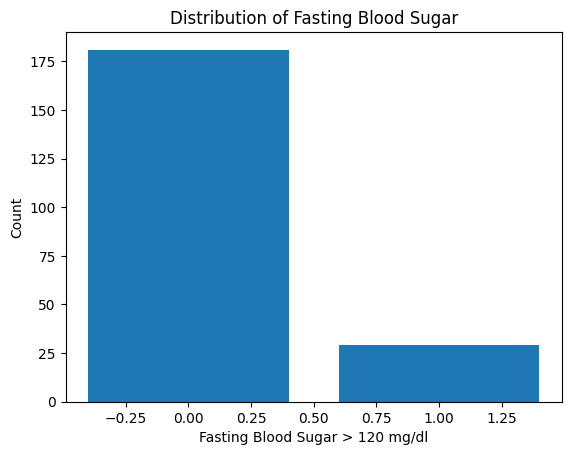



Since the 'fbs' feature is categorical, there is no specific distribution type associated with it.
Since the 'fbs' feature is categorical, it does not follow a normal distribution. Statistical tests for normality are not applicable to categorical variables.




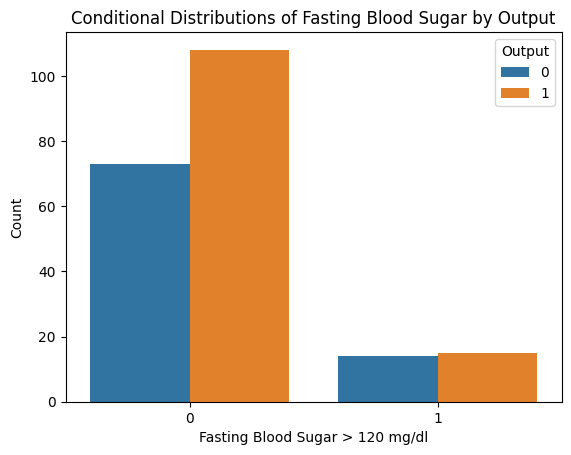

In [ ]:
import matplotlib.pyplot as plt

# Plot the bar plot
fbs_counts = train_data['fbs'].value_counts()
plt.bar(fbs_counts.index, fbs_counts.values)
plt.xlabel('Fasting Blood Sugar > 120 mg/dl')
plt.ylabel('Count')
plt.title('Distribution of Fasting Blood Sugar')
plt.show()
print("\n")
print("Since the 'fbs' feature is categorical, there is no specific distribution type associated with it.")
print("Since the 'fbs' feature is categorical, it does not follow a normal distribution. Statistical tests for normality are not applicable to categorical variables.")
print("\n")

# Plot conditional distributions using count plot
sns.countplot(x='fbs', hue='output', data=train_data)
plt.xlabel('Fasting Blood Sugar > 120 mg/dl')
plt.ylabel('Count')
plt.title('Conditional Distributions of Fasting Blood Sugar by Output')
plt.legend(title='Output', loc='upper right')
plt.show()


> ## ${\color{yellow} {9- restecg: \text {resting electrocardiographic results}}}$


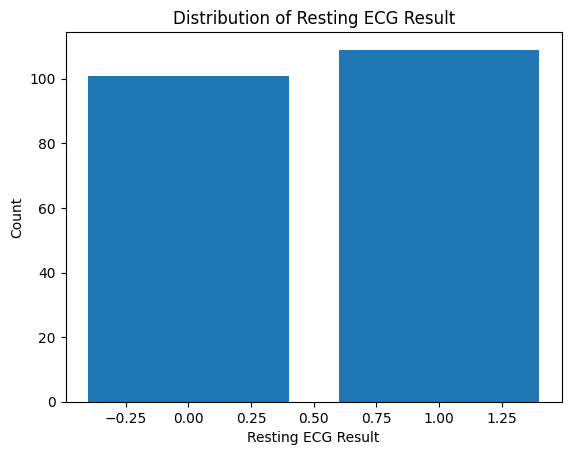



Since the 'restecg' feature is categorical, there is no specific distribution type associated with it.
Since the 'restecg' feature is categorical, it does not follow a normal distribution. Statistical tests for normality are not applicable to categorical variables.




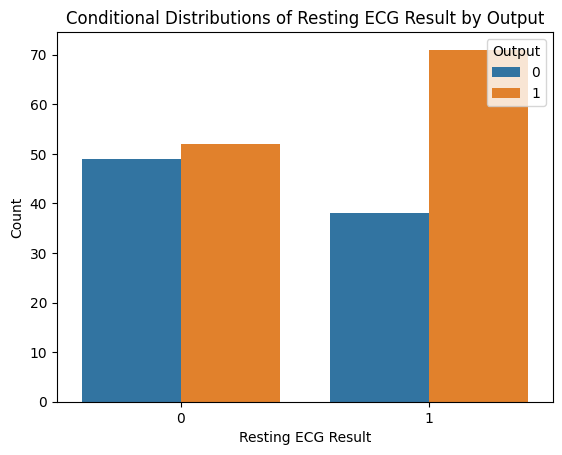

In [ ]:
import matplotlib.pyplot as plt

# Plot the bar plot
restecg_counts = train_data['restecg'].value_counts()
plt.bar(restecg_counts.index, restecg_counts.values)
plt.xlabel('Resting ECG Result')
plt.ylabel('Count')
plt.title('Distribution of Resting ECG Result')
plt.show()
print("\n")
print("Since the 'restecg' feature is categorical, there is no specific distribution type associated with it.")
print("Since the 'restecg' feature is categorical, it does not follow a normal distribution. Statistical tests for normality are not applicable to categorical variables.")
print("\n")


# Plot conditional distributions using count plot
sns.countplot(x='restecg', hue='output', data=train_data)
plt.xlabel('Resting ECG Result')
plt.ylabel('Count')
plt.title('Conditional Distributions of Resting ECG Result by Output')
plt.legend(title='Output', loc='upper right')
plt.show()


> ## ${\color{yellow} {10-thalachh: \text {Max Heart Rate Achieved}}}$


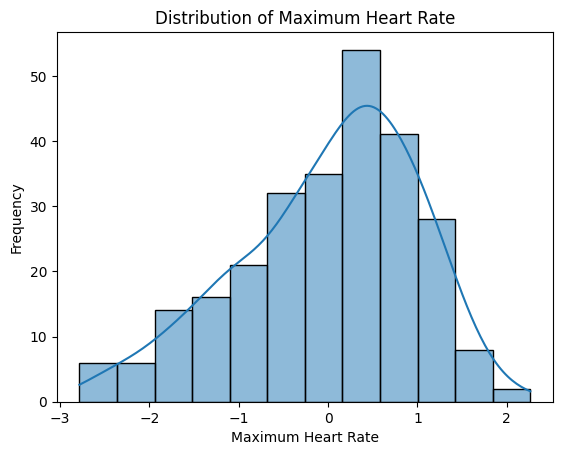

By visual inspection, we notice that the destribution of 'thalachh' is normal distribution


 ===>> The 'thalachh' feature is normally distributed (fail to reject H0)


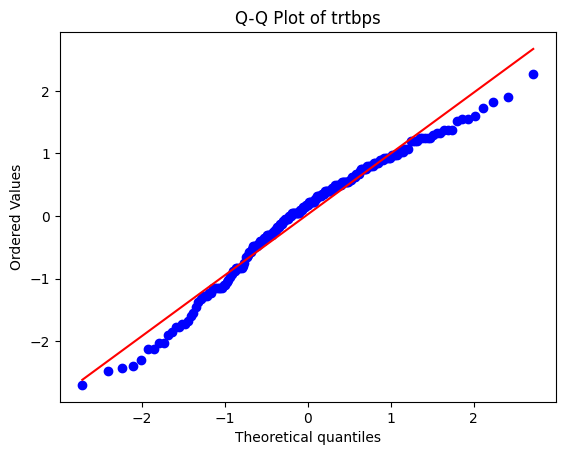

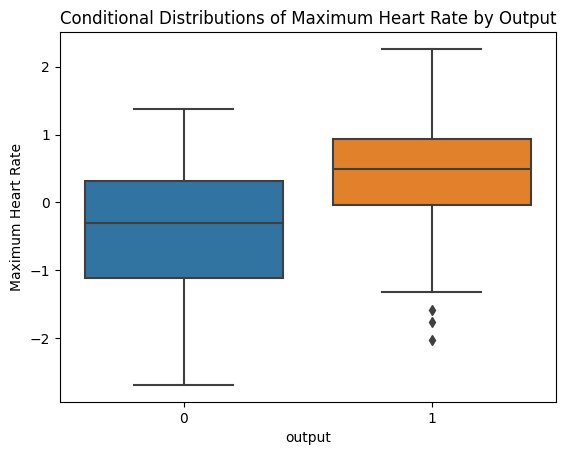

In [ ]:
# 1. Plot the histogram
sns.histplot(HEART, x="thalachh", kde=True)
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Maximum Heart Rate')
plt.show()

# 2. Type of distribution
print("By visual inspection, we notice that the destribution of 'thalachh' is normal distribution")


# 3. Perform test for normality
#Kolmogorov-Smirnov test
stat, p_value = kstest(train_data['thalachh'], 'norm')
alpha = 0.05  # Significance level
# Interpret the test result
if p_value > alpha:
    print("\n\n ===>> The 'thalachh' feature is normally distributed (fail to reject H0)")
else:
    print("\n\n ===>> The 'thalachh' feature is normally distributed (fail to reject H0)")


# Generate a Q-Q plot to compare the data against a normal distribution
stats.probplot(train_data['thalachh'], dist='norm', plot=plt)
plt.title('Q-Q Plot of trtbps')
plt.show()


# 4. Plot conditional distributions using box plots
sns.boxplot(x='output', y='thalachh', data=train_data)
plt.xlabel('output')
plt.ylabel('Maximum Heart Rate')
plt.title('Conditional Distributions of Maximum Heart Rate by Output')
plt.show()



> ## ${\color{yellow} {11- oldpeak: \text {Previous Peak}}}$


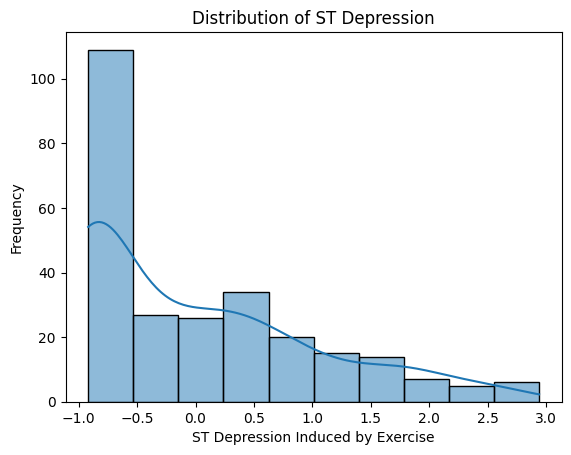

By visual inspection, we notice that the destribution of 'oldpeak' is skewed distribution

-------------------------------------------------------------------------------

-------------------------------------------------------------------------------

The data is significantly skewed (reject H0)
===>> The 'oldpeak' feature is not normally distributed (reject H0)

-------------------------------------------------------------------------------



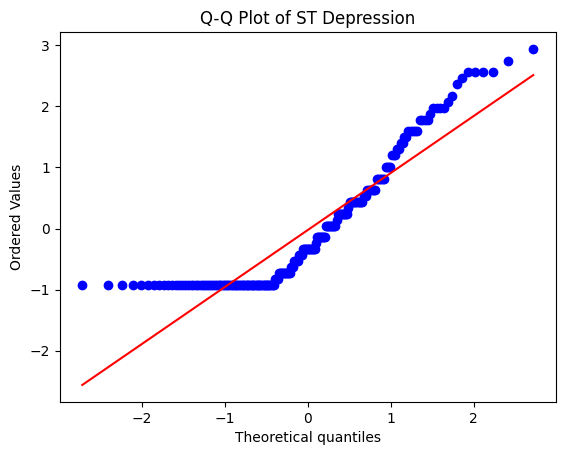

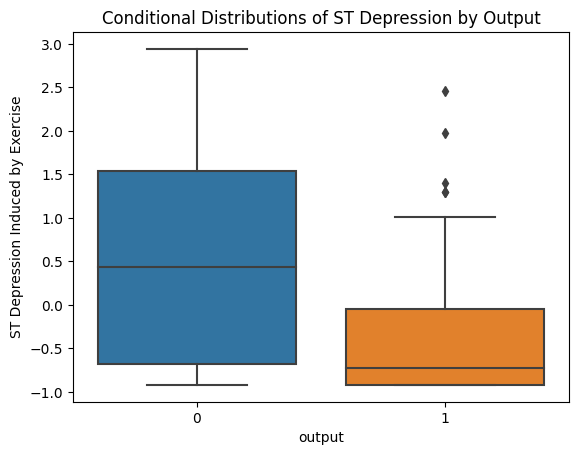

In [ ]:
# 1. Plot the histogram
sns.histplot(HEART, x="oldpeak", kde=True)
plt.xlabel('ST Depression Induced by Exercise')
plt.ylabel('Frequency')
plt.title('Distribution of ST Depression')
plt.show()

#type of the distribution
print("By visual inspection, we notice that the destribution of 'oldpeak' is skewed distribution")

print('\n-------------------------------------------------------------------------------\n')
# 2. Type of distribution
print('-------------------------------------------------------------------------------\n')

# Skewness test
test_stat, p_value_skew = stats.skewtest(train_data['oldpeak'])

# Interpret the test results
if p_value_skew > alpha:
    print("The data is not significantly skewed (fail to reject H0)")
else:
    print("The data is significantly skewed (reject H0)")

# 3. Perform test for normality
#Shapiro-Wilk test
stat, p_value = shapiro(train_data['oldpeak'])

alpha = 0.05  # Significance level

# Interpret the test result

if p_value > alpha:
    print("\n\n ===>> The 'oldpeak' feature is normally distributed (fail to reject H0)")
else:
    print("===>> The 'oldpeak' feature is not normally distributed (reject H0)\n")

print('-------------------------------------------------------------------------------\n')



# Generate a Q-Q plot to compare the data against a normal distribution
stats.probplot(train_data['oldpeak'], dist='norm', plot=plt)
plt.title('Q-Q Plot of ST Depression')
plt.show()

# 4. Plot conditional distributions using box plots
sns.boxplot(x='output', y='oldpeak', data=train_data)
plt.xlabel('output')
plt.ylabel('ST Depression Induced by Exercise')
plt.title('Conditional Distributions of ST Depression by Output')
plt.show()

> ## ${\color{yellow} {12- slp: \text {ST_Slope}}}$


* Upsloping = 0
*   Flat = 1
*   Downsloping = 2





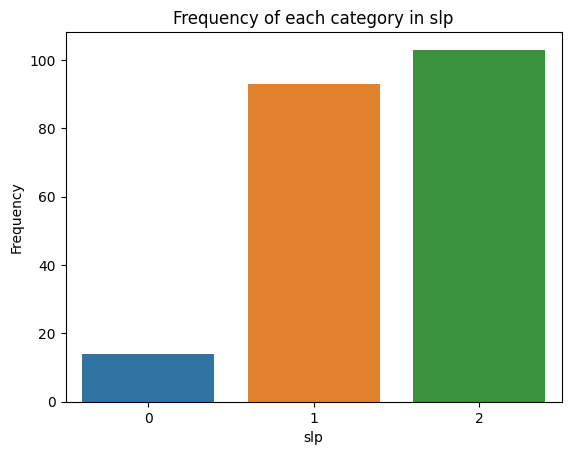


-------------------------------------------------------------------------------

-------------------------------------------------------------------------------

===>> Statistical test for normality (not applicable to categorical variables):
Tests for normality are specifically designed for numerical variables, as they assess whether the data follows a Gaussian (normal) distribution.
Since 'slp' is categorical, it doesn't make sense to test for normality using statistical tests like the Shapiro-Wilk test.

-------------------------------------------------------------------------------



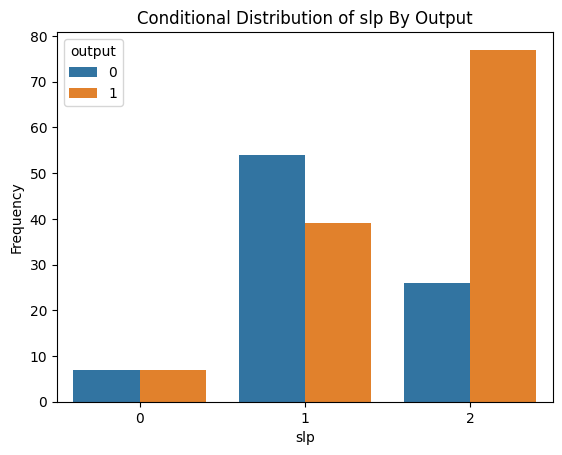

In [ ]:
# 1. Plot the frequency
sns.countplot(x='slp', data=train_data)
plt.xlabel('slp')
plt.ylabel('Frequency')
plt.title('Frequency of each category in slp')
plt.show()

print('\n-------------------------------------------------------------------------------\n')
# 2. Type of distribution

print('-------------------------------------------------------------------------------\n')

# 3. Perform test for normality

print("===>> Statistical test for normality (not applicable to categorical variables):")
print("Tests for normality are specifically designed for numerical variables, as they assess whether the data follows a Gaussian (normal) distribution.")
print("Since 'slp' is categorical, it doesn't make sense to test for normality using statistical tests like the Shapiro-Wilk test.\n")


print('-------------------------------------------------------------------------------\n')

# 4. Plot conditional distributions using count plots
sns.countplot(x='slp', hue='output', data=train_data)
plt.xlabel('slp')
plt.ylabel('Frequency')
plt.title('Conditional Distribution of slp By Output')
plt.show()



> ## ${\color{yellow} {13- thall: \text {Thallium Stress Test Result }}}$


*   Normal = 0
*   Fixed Defect = 1
*   Reversible Defect = 2
*   Unknown = 3



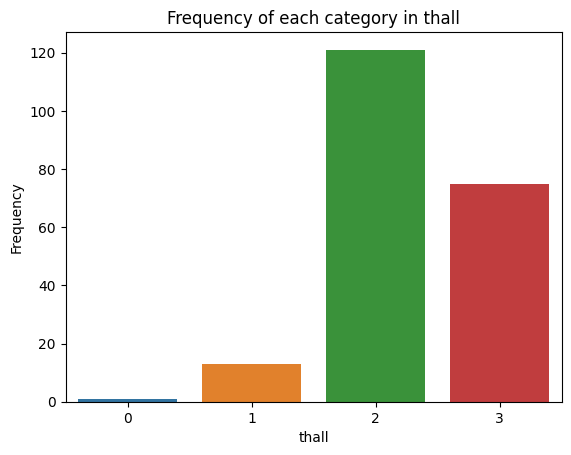


-------------------------------------------------------------------------------

-------------------------------------------------------------------------------

===>> Statistical test for normality (not applicable to categorical variables):
Tests for normality are specifically designed for numerical variables, as they assess whether the data follows a Gaussian (normal) distribution.
Since 'thall' is categorical, it doesn't make sense to test for normality using statistical tests like the Shapiro-Wilk test.

-------------------------------------------------------------------------------



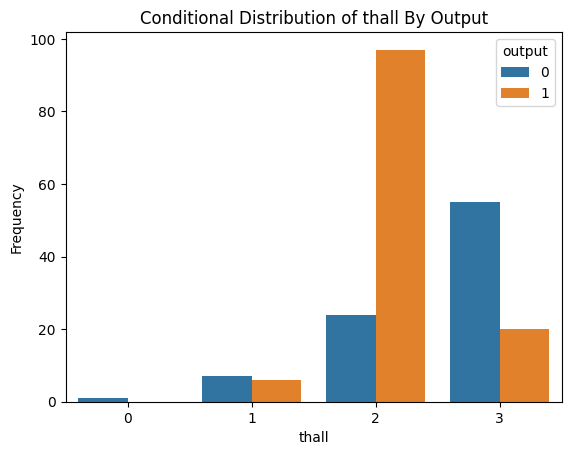

In [ ]:
# 1. Plot the frequency
sns.countplot(x='thall', data=train_data)
plt.xlabel('thall')
plt.ylabel('Frequency')
plt.title('Frequency of each category in thall')
plt.show()

print('\n-------------------------------------------------------------------------------\n')
# 2. Type of distribution

print('-------------------------------------------------------------------------------\n')

# 3. Perform test for normality

print("===>> Statistical test for normality (not applicable to categorical variables):")
print("Tests for normality are specifically designed for numerical variables, as they assess whether the data follows a Gaussian (normal) distribution.")
print("Since 'thall' is categorical, it doesn't make sense to test for normality using statistical tests like the Shapiro-Wilk test.\n")


print('-------------------------------------------------------------------------------\n')

# 4. Plot conditional distributions using count plots
sns.countplot(x='thall', hue='output', data=train_data)
plt.xlabel('thall')
plt.ylabel('Frequency')
plt.title('Conditional Distribution of thall By Output')
plt.show()



# **<span style="color:blue"> VII. Naïve Bayes (NB) Clsssifier: </span>**

---




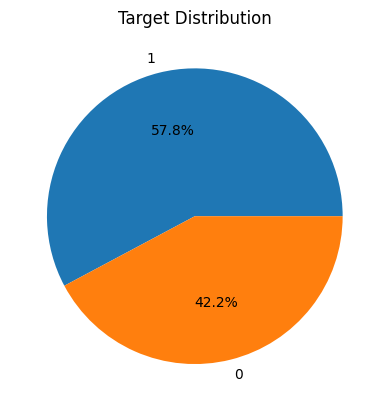

In [ ]:
target_count = HEART['output'].value_counts()
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

## check dependencies among the features

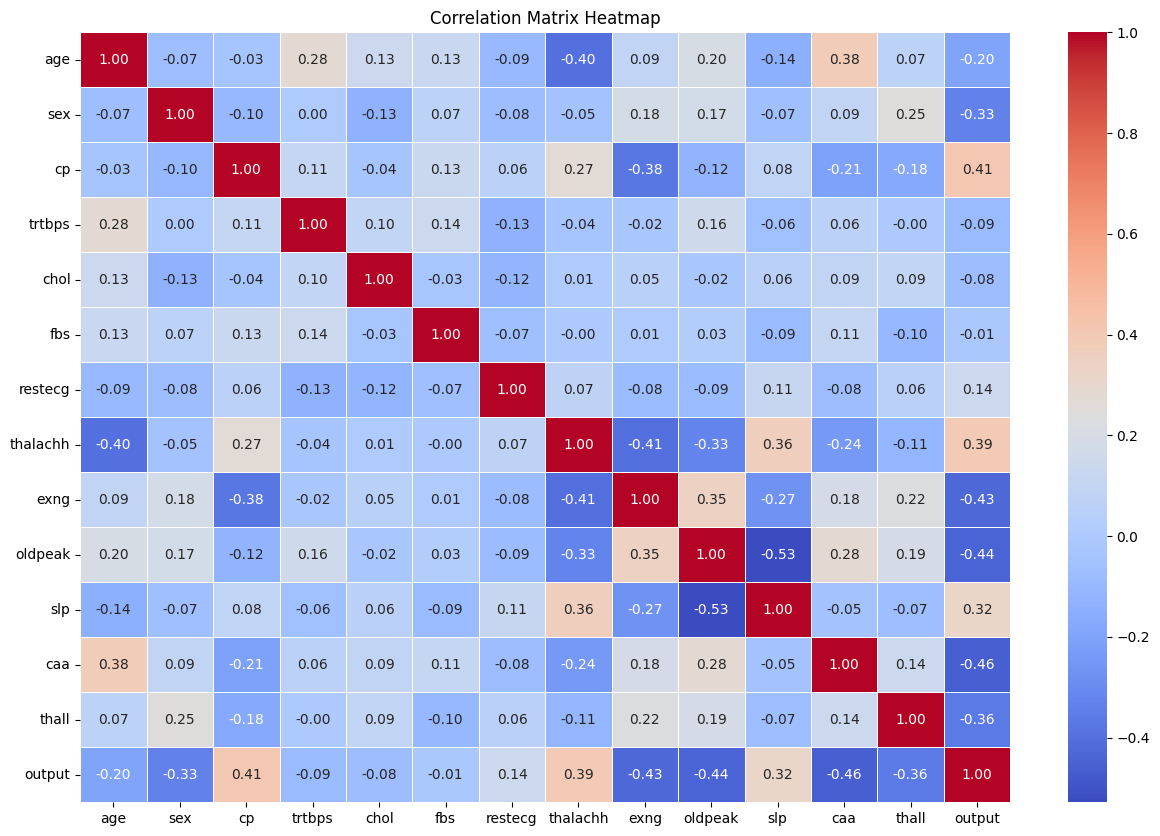

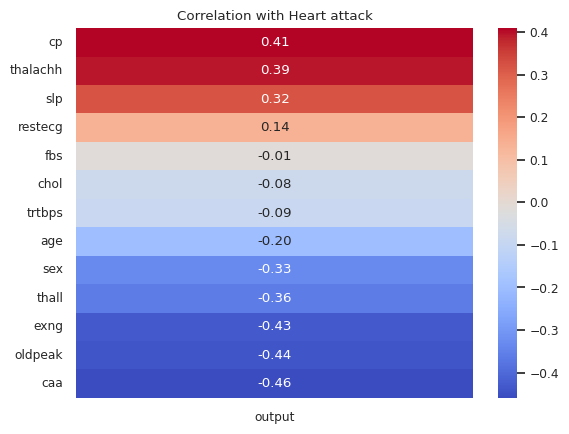

In [ ]:
# this code generates a correlation matrix for the selected columns of the HEART dataset using Pearson correlation coefficients.
# it then visualizes the correlation matrix as a heatmap, where the colors represent the strength and direction of the correlations between the variables.
# the heatmap provides a visual representation of the relationships between different variables in the dataset, helping to identify patterns and dependencies among the features.

correlation_matrix = HEART.corr(method="pearson", numeric_only=True )# matrix contains the Pearson correlation coefficients between the selected columns.

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()
corr = HEART.corr()
target_corr = corr['output'].drop('output')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Heart attack')
plt.show()


## Replotting the distribution of the numerical features to check if they fit a known distribution

<Axes: xlabel='trtbps', ylabel='Count'>

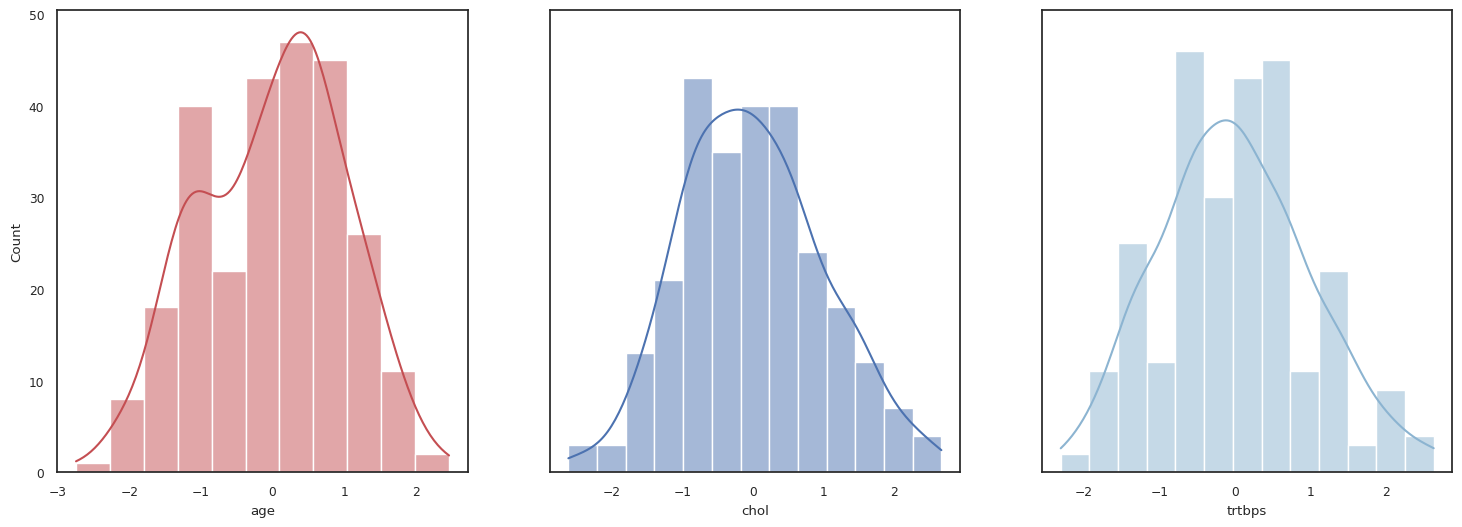

In [ ]:
# this code generates three side-by-side histograms with KDE curves for the "age", "chol", and "trtbps" columns.
# the histograms provide visual representations of the distribution and density of values in each column.
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # 'fig' is a variable that represents the overall figure, while 'axes' is an array of axes objects representing each individual subplot.
sns.histplot(HEART, ax=axes[0], x="age", kde=True, color='r')
sns.histplot(HEART, ax=axes[1], x="chol", kde=True, color='b')
sns.histplot(HEART, ax=axes[2], x="trtbps", kde=True)

<Axes: xlabel='caa', ylabel='Count'>

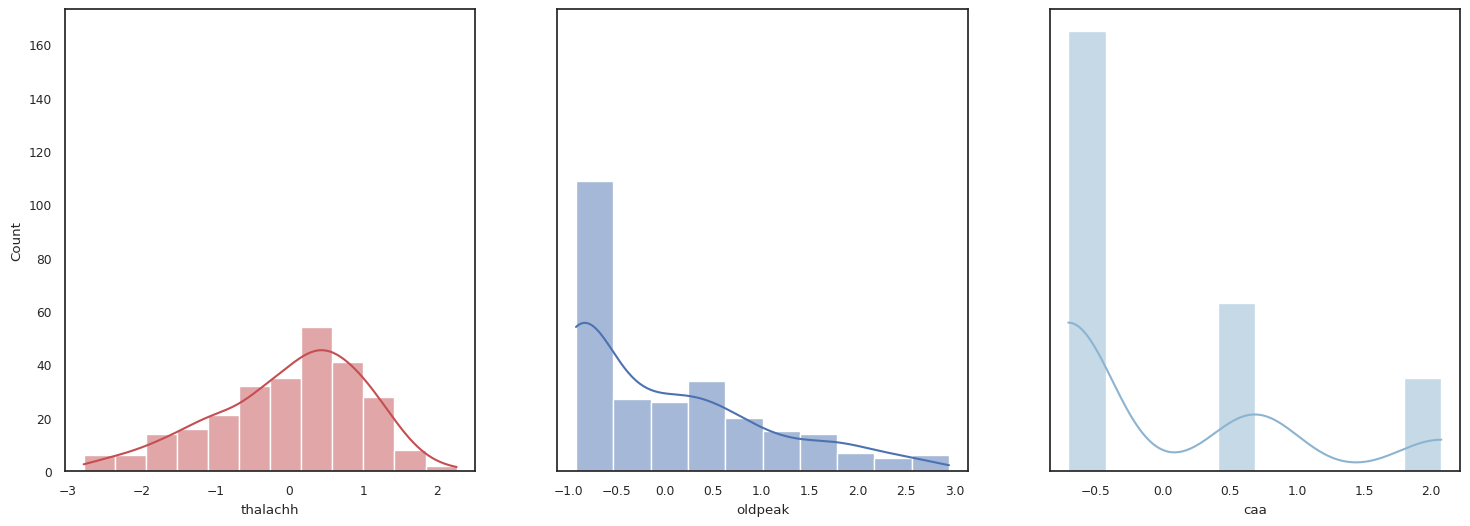

In [ ]:
#  this code creates a figure with three subplots in a row, and it plots histograms for the "thalachh" and "oldpeak" variables from the HEART dataset in the first and second subplots, respectively.
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(HEART, ax=axes[0], x="thalachh", kde=True, color='r')
sns.histplot(HEART, ax=axes[1], x="oldpeak", kde=True, color='b')
sns.histplot(HEART, ax=axes[2], x="caa", kde=True)

In [ ]:
# calculates the prior probabilities of each class in the specified column 'Y' of the DataFrame 'df'.
# it does so by counting the occurrences of each class and dividing it by the total number of rows in the DataFrame.
# the function returns a list of prior probabilities.
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

 probability density function (PDF) of the Gaussian distribution $f(x) = \frac{1}{\sigma\sqrt{2\pi}}
  \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right)$


In [ ]:
# calculates the likelihood probability of a given feature value 'feat_val' occurring, given a specific class 'label', assuming a Gaussian (normal) distribution.
def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    # retrieves the column names of the DataFrame 'df' and converts them into a list.
    feat = list(df.columns)
    # filters the DataFrame 'df' to select only the rows where the column 'Y' is equal to the specified 'label'.
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    # calculates the likelihood probability 'p(x|y)' using a Gaussian (normal) distribution.
    # it computes the probability density function (PDF) of the Gaussian distribution for the given 'feat_val' using the mean ('mean') and standard deviation ('std') obtained from the filtered DataFrame 'df'.
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

In [ ]:
# calculates the likelihood probability of a given feature value 'feat_val' occurring, given a specific class 'label', assuming a Gaussian (normal) distribution.
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    df = df[df[Y]==label]  # Filters the DataFrame 'df' to select only the rows where the column 'Y' is equal to the specified 'label'
    count_label = df[df[feat_name] == feat_val].shape[0]  # Counts the occurrences of the specified 'feat_val' for the given 'label'
    count_total = df.shape[0]  # Counts the total number of occurrences of the given 'label'
    p_x_given_y = count_label / count_total  # Calculates the likelihood probability 'p(x|y)' for the given categorical feature value 'feat_val'
    return p_x_given_y

In [ ]:
# implements the Gaussian Naïve Bayes classifier.
# it calculates the prior probabilities, likelihood probabilities, and posterior probabilities (numerator only) for each class label and data sample.
# predicts the class label with the highest posterior probability for each sample.
def naive_bayes(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]
    labels = sorted(list(df[Y].unique()))
    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        likelihood = [1] * len(labels)
        for j, label in enumerate(labels):
            for i, feat in enumerate(features):
                if feat in num_col:
                    likelihood[j] *= calculate_likelihood_gaussian(df, feat, x[i], Y, label)
                else:
                    likelihood[j] *= calculate_likelihood_categorical(df, feat, x[i], Y, label)

        # calculate posterior probability (numerator only)
        post_prob = [likelihood[j] * prior[j] for j in range(len(labels))]
        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)


In [ ]:
pred_output= naive_bayes(train_data, X=test_features, Y="output")

from sklearn.metrics import confusion_matrix, f1_score
# compute the confusion matrix, which provides an overview of the classifier's performance.
print(confusion_matrix(test_output,pred_output ))
# measure of the classifier's accuracy.
print(f1_score(test_output,pred_output ))


[[20  4]
 [ 4 25]]
0.8620689655172413


## our results compare to the NB classifier from standard Python packages

In [ ]:
pip install mixed-naive-bayes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from sklearn.preprocessing import LabelEncoder
from mixed_naive_bayes import MixedNB


# Create a LabelEncoder object
le = LabelEncoder()

# Encode the categorical features
for col in cat_col:
    HEART[col] = le.fit_transform(HEART[col])


# Create a MixedNB classifier
clf = MixedNB()

# Train the classifier
clf.fit(train_features, train_output)

# Make predictions
predictions = clf.predict(test_features)

# Evaluate the accuracy
accuracy = np.mean(predictions == test_output)

print("Accuracy:", accuracy)


Accuracy: 0.9245283018867925
